# DATA WRANGLING


## Topic-WeRateDogs

## Intoduction
The purpose of this project is to practice what we have learnt in UDACITY Data Wrangling Course.Here we will deal with real world Twitter Data and practice the skills of Data Wangling that we have learnt.

## Gathering Data 
1.Twitter Archieve File: This file is downloaded manually  from  Udacity Project Details tab .

2.Image Prediction File: This file (image_predictions.tsv) is hosted on Udacity's servers and will be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3.Twitter API File: It can be downloaded with the help of tweepy library of python programmatically.

In [22]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import tweepy
import time
%matplotlib inline

## GATHER
### 1.Twitter Archived Enhanced Data

In [5]:
twitter_df=pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2.Image Prediction Data

In [6]:
# Using requests library of python to extract data from url provided by UDACITY.
url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)
with open('image-predictions.tsv','wb') as file:
    file.write(response.content)
   
#Reading file in a DataFrame
image_pred_df=pd.read_csv('image-predictions.tsv',sep='\t')

In [7]:
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3.Twitter API Data 

In [17]:
# Configuring Tweepy
CONSUMER_KEY ='OUuYFklBLH8XDmTGeOVpDGdHm'
CONSUMER_SECRET = 'R9QO6XFx6nU0bRWszd2yvYppXEsQKtQHoWUXh9O3dRPcqvmTh3' 
OAUTH_TOKEN ='703240547801047041-WDqzSTOGgA8iGUSHAVgjGuw0sRzIlwP'
OAUTH_TOKEN_SECRET ='JtO0b91tFHde29K8woRJqB1R5m1smYMVBkl8JcCBPoGqe'

In [18]:
# using tweepy library

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [20]:
# list of tweet ids from enhanced data set
df_tweet_ids = twitter_df['tweet_id']

In [24]:
with open('tweet_json.txt', 'w') as output:
    for tweet_id in df_tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
        except tweepy.TweepError:
            print('Error: tweet missing')

Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet 

In [32]:
# Converting relevant JSON data to dataframe

tweets_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        try:
            tweets_dict['tweet_id'] = tweets_json['extended_entities']['media'][0]['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        
        tweets_list.append(tweets_dict)

In [34]:
tweets_json_df = pd.DataFrame(tweets_list)
tweets_json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420639486877696,7634,35943
1,892177413194625024,5644,31011
2,891815175371796480,3740,23333
3,891689552724799489,7798,39213
4,891327551943041024,8398,37450


### GATHER:Conclusion
1.twitter_df: It contains data provided by 'twitter-archive-enhanced.csv'.

2.image_pred_df: It contains data provifded by the url.

3.tweets_json_df: It cotains data gathered from Twitter API using tweepy library.

## ASSESING DATA

### 1.twitter_df/Twitter Archive Enhanced Data


### VISUAL ASSESMENT

In [35]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### PROGRAMMATIC ASSESMENT

In [37]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [39]:
#Checking missing values
twitter_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [58]:
#Checking duplicates value
twitter_df.duplicated().sum()

0

In [83]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [85]:
twitter_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [86]:
twitter_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### 2.image_pred_df/Image Prediction Data


### VISUAL ASSESMENT

In [42]:
image_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### PROGRAMMATIC ASSESMENT

In [44]:
#Checking complete information about the data
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
#Checking for missing values
image_pred_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [48]:
#Checking for duplicated values
image_pred_df.duplicated().sum()

0

### 3.tweets_json_df/Twitter API Data

### VISUAL ASSESMENT

In [49]:
tweets_json_df

,tweet_id,retweet_count,favorite_count
0,892420639486877696,7634,35943
1,892177413194625024,5644,31011
2,891815175371796480,3740,23333
3,891689552724799489,7798,39213
4,891327551943041024,8398,37450
...,...,...,...
2278,666050754986266625,51,124
2279,666049244999131136,40,96
2280,666044217047650304,130,270
2281,666029276303482880,42,120


### PROGRAMMATIC ASSESMENT

In [51]:
#Checking complete information about the data
tweets_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2283 entries, 0 to 2282
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2283 non-null   object
 1   retweet_count   2283 non-null   int64 
 2   favorite_count  2283 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 53.6+ KB


In [52]:
#Checking for missing values
tweets_json_df.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [57]:
#Checking for duplicate values
tweets_json_df.duplicated().sum()

1

## QUALITY ISSUES
### 1.Twitter Archive Enhanced Data
1. timestamp &  retweeted_status_timestamp should have datatype = datetime  instead of object.
2. Datatypes of tweet_id, in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be string instead of float/int.
3. The numerator and denominator columns have invalid values.(Derived with the help of .describe() method)

### 2.Image Prediction Data
1. Entries where the first (i.e. most confident prediction) has a False value for "p1_dog" (i.e. does not correspond to a type of dog) will be removed.
2.  The "p2" and "p3" related columns will be removed as I am only using the most likely prediction ("p1") in my analysis
3. After removal of "False" entries, the "p1_dog" column will be removed as it will no longer add any valuable information.
4. The datatype of tweet_id should be string instead of int.

### 3.Twitter API Data
1. Drop dulpicate data.


## TIDINESS ISSUES
1. The column "jpg_url" from image_pred_df should be removed since url data is already contained in the twitter archive data
2. Merge all the dataframes to make a single dataframe.

## CLEANING DATA-Quality Issues


In [221]:
#Copying DataFrames
twitter_df_clean=twitter_df.copy()
image_clean=image_pred_df.copy()
tweets_api_clean=tweets_json_df.copy()

###  Twitter Archive Enhanced Data

### DEFINE
Rating Denominator and rating numerator issues .

### CODE

In [222]:
twitter_df_clean.drop(twitter_df_clean[twitter_df_clean.rating_denominator != 10].index,inplace=True)

### TEST

In [223]:
twitter_df_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

### CODE

In [224]:
#Multiple cases of where the rating_numerator of rating < 10
twitter_df_clean.drop(twitter_df_clean[twitter_df_clean.rating_numerator < 10].index,inplace=True)


### TEST

In [225]:
twitter_df_clean.rating_numerator.value_counts()

12      558
11      463
10      461
13      351
14       54
420       2
75        2
15        2
1776      1
666       1
182       1
27        1
26        1
17        1
Name: rating_numerator, dtype: int64

### DEFINE
2.timestamp & retweeted_status_timestamp should have datatype = datetime instead of object.

### CODE

In [226]:
twitter_df_clean['timestamp']=pd.to_datetime(twitter_df_clean['timestamp'])

In [227]:
twitter_df_clean['retweeted_status_timestamp']=pd.to_datetime(twitter_df_clean['retweeted_status_timestamp'])

### TEST

In [228]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 2350
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1899 non-null   int64              
 1   in_reply_to_status_id       62 non-null     float64            
 2   in_reply_to_user_id         62 non-null     float64            
 3   timestamp                   1899 non-null   datetime64[ns, UTC]
 4   source                      1899 non-null   object             
 5   text                        1899 non-null   object             
 6   retweeted_status_id         172 non-null    float64            
 7   retweeted_status_user_id    172 non-null    float64            
 8   retweeted_status_timestamp  172 non-null    datetime64[ns, UTC]
 9   expanded_urls               1853 non-null   object             
 10  rating_numerator            1899 non-null   int64           

### DEFINE
3. Datatypes of tweet_id, in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be string instead of float/int.

### CODE

In [229]:
twitter_df_clean[['tweet_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']]=twitter_df_clean[['tweet_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']].astype('str')

### TEST

In [230]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 2350
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1899 non-null   object             
 1   in_reply_to_status_id       1899 non-null   object             
 2   in_reply_to_user_id         1899 non-null   object             
 3   timestamp                   1899 non-null   datetime64[ns, UTC]
 4   source                      1899 non-null   object             
 5   text                        1899 non-null   object             
 6   retweeted_status_id         1899 non-null   object             
 7   retweeted_status_user_id    1899 non-null   object             
 8   retweeted_status_timestamp  172 non-null    datetime64[ns, UTC]
 9   expanded_urls               1853 non-null   object             
 10  rating_numerator            1899 non-null   int64           

### Image Prediction Data

### DEFINE
Entries where the first (i.e. most confident prediction) has a False value for "p1_dog" (i.e. does not correspond to a type of dog) will be removed.


### CODE

In [231]:
image_clean.drop(image_clean[image_clean.p1_dog == False].index, inplace=True)

### TEST

In [232]:
image_clean.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

### DEFINE
The "p2" and "p3" related columns will be removed as I am only using the most likely prediction ("p1") in my analysis

### CODE

In [233]:
image_clean.drop(['p2','p3'], inplace=True, axis=1)

### TEST

In [234]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2_conf',
       'p2_dog', 'p3_conf', 'p3_dog'],
      dtype='object')

### DEFINE
After removal of "False" entries, the "p1_dog" column will be removed as it will no longer add any valuable information.


### CODE

In [235]:
image_clean.drop('p1_dog',inplace=True,axis=1)

### TEST

In [236]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p2_conf', 'p2_dog',
       'p3_conf', 'p3_dog'],
      dtype='object')

### DEFINE
The datatype of tweet_id should be string instead of int.


### CODE

In [237]:
image_clean['tweet_id']=image_clean['tweet_id'].astype('str')

### TEST

In [238]:
image_clean.tweet_id.dtype

dtype('O')

### Twitter API Data

### DEFINE
Drop dulpicate data.


### CODE

In [239]:
tweets_api_clean.duplicated().sum()

1

In [240]:
tweets_api_clean.drop_duplicates(inplace=True)

### TEST

In [251]:
tweets_api_clean.duplicated().sum()

0

In [252]:
tweets_api_clean.shape

(2282, 3)

### TIDENESS


### CODE

In [242]:
image_clean.drop('jpg_url',inplace=True,axis=1)

### TEST

In [243]:
image_clean.columns

Index(['tweet_id', 'img_num', 'p1', 'p1_conf', 'p2_conf', 'p2_dog', 'p3_conf',
       'p3_dog'],
      dtype='object')

### DEFINE
Merge all the dataframes to make a single dataframe.


### CODE

In [244]:
main_df_1= pd.merge(twitter_df_clean, image_clean, on='tweet_id', how='left')

In [245]:
main_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 1898
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1899 non-null   object             
 1   in_reply_to_status_id       1899 non-null   object             
 2   in_reply_to_user_id         1899 non-null   object             
 3   timestamp                   1899 non-null   datetime64[ns, UTC]
 4   source                      1899 non-null   object             
 5   text                        1899 non-null   object             
 6   retweeted_status_id         1899 non-null   object             
 7   retweeted_status_user_id    1899 non-null   object             
 8   retweeted_status_timestamp  172 non-null    datetime64[ns, UTC]
 9   expanded_urls               1853 non-null   object             
 10  rating_numerator            1899 non-null   int64           

In [249]:
main_df = pd.merge(main_df_1, tweets_api_clean,on=['tweet_id'],how='left')

In [261]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 1898
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1899 non-null   object             
 1   in_reply_to_status_id       1899 non-null   object             
 2   in_reply_to_user_id         1899 non-null   object             
 3   timestamp                   1899 non-null   datetime64[ns, UTC]
 4   source                      1899 non-null   object             
 5   text                        1899 non-null   object             
 6   retweeted_status_id         1899 non-null   object             
 7   retweeted_status_user_id    1899 non-null   object             
 8   retweeted_status_timestamp  172 non-null    datetime64[ns, UTC]
 9   expanded_urls               1853 non-null   object             
 10  rating_numerator            1899 non-null   int64           

### Cleaning Main DataFrame 
Dropping the columns not in use.

### CODE

In [262]:
main_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True,axis=1)

### TEST

In [263]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 1898
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1899 non-null   object             
 1   timestamp           1899 non-null   datetime64[ns, UTC]
 2   source              1899 non-null   object             
 3   text                1899 non-null   object             
 4   expanded_urls       1853 non-null   object             
 5   rating_numerator    1899 non-null   int64              
 6   rating_denominator  1899 non-null   int64              
 7   name                1899 non-null   object             
 8   doggo               1899 non-null   object             
 9   floofer             1899 non-null   object             
 10  pupper              1899 non-null   object             
 11  puppo               1899 non-null   object             
 12  img_num             1298 non-null 

#### Converting main_df to .scv format file.

In [264]:
main_df.to_csv('twitter_archive_master.csv',encoding='utf-8',index=False)

# Visulaization & Analysis

In [266]:
df=pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,puppo,img_num,p1,p1_conf,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7634.0,35943.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,None,1.0,Chihuahua,0.323581,0.090647,True,0.068957,True,5644.0,31011.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,None,1.0,Chihuahua,0.716012,0.078253,True,0.031379,True,3740.0,23333.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7798.0,39213.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,None,2.0,basset,0.555712,0.225770,True,0.175219,True,8398.0,37450.0


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1899 non-null   int64  
 1   timestamp           1899 non-null   object 
 2   source              1899 non-null   object 
 3   text                1899 non-null   object 
 4   expanded_urls       1853 non-null   object 
 5   rating_numerator    1899 non-null   int64  
 6   rating_denominator  1899 non-null   int64  
 7   name                1899 non-null   object 
 8   doggo               1899 non-null   object 
 9   floofer             1899 non-null   object 
 10  pupper              1899 non-null   object 
 11  puppo               1899 non-null   object 
 12  img_num             1298 non-null   float64
 13  p1                  1298 non-null   object 
 14  p1_conf             1298 non-null   float64
 15  p2_conf             1298 non-null   float64
 16  p2_dog

## 1. Most Common Dog

In [281]:
doggo_count=df.doggo.value_counts()[1]
floofer_count=df.floofer.value_counts()[1]
pupper_count=df.pupper.value_counts()[1]
puppo_count=df.puppo.value_counts()[1]

In [286]:
dog_count=[doggo_count,floofer_count,pupper_count,puppo_count]
dog_category=['doggo','floofer','pupper','puppo']

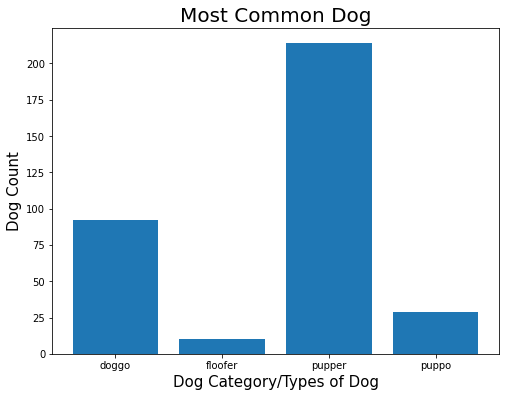

In [301]:
plt.figure(figsize=(8,6))
plt.bar(dog_category,dog_count)
plt.title("Most Common Dog",fontsize=20)
plt.xlabel("Dog Category/Types of Dog",fontsize=15)
plt.ylabel("Dog Count",fontsize=15)
plt.savefig('commondog.jpg')
plt.show()

## 2.Relation between favourites and retweets

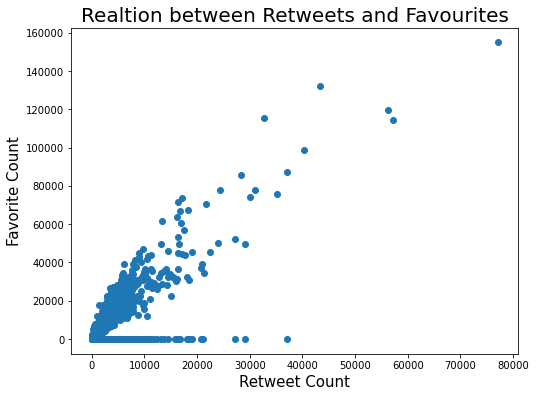

In [303]:
plt.figure(figsize=(8,6))
plt.scatter(df.retweet_count,df.favorite_count)
plt.title("Realtion between Retweets and Favourites",fontsize=20)
plt.xlabel("Retweet Count",fontsize=15)
plt.ylabel("Favorite Count",fontsize=15)
plt.savefig('retweet_favorite.jpg')
plt.show()

In [304]:
df[['retweet_count','favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.00000,0.79677
favorite_count,0.79677,1.00000


## Breed Prediction:MOST COMMON BREED/TOP-10 BREED

In [325]:
df_dog_breed = df.groupby('p1').filter(lambda x: len(x) >= 25)

In [326]:
df_dog_breed['p1'].value_counts()

golden_retriever      139
Labrador_retriever     89
Pembroke               84
Chihuahua              67
chow                   44
pug                    43
Samoyed                42
Pomeranian             38
toy_poodle             34
cocker_spaniel         28
malamute               27
Name: p1, dtype: int64

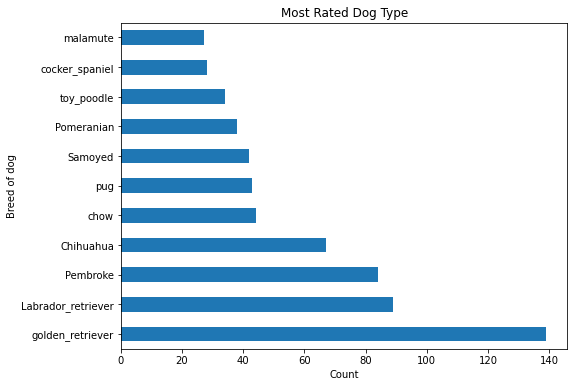

In [329]:
#plotting the values
plt.figure(figsize=(8,6))
df_dog_breed['p1'].value_counts().plot(kind='barh')
plt.title('Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Breed of dog')
plt.savefig('breed.jpg')
plt.show()